In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
#import seaborn as seabornInstance
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#from scipy.interpolate import CubicSpline
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [2]:
dataset = pd.read_csv("co2emission.csv")
dataset

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [3]:
new_data = dataset[["country", "year", "co2_per_capita"]]

new_data.tail()

,country,year,co2_per_capita
50593,Zimbabwe,2017,0.651
50594,Zimbabwe,2018,0.784
50595,Zimbabwe,2019,0.724
50596,Zimbabwe,2020,0.677
50597,Zimbabwe,2021,0.706


In [4]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [5]:
print(europe.isnull())

       country   year  co2_per_capita
788      False  False            True
789      False  False            True
790      False  False            True
791      False  False            True
792      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[8708 rows x 3 columns]


In [5]:
missing_counts = europe.isnull().sum()
print(missing_counts)

country              0
year                 0
co2_per_capita    1328
dtype: int64


In [6]:
europe.info()
europe.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


,country,year,co2_per_capita
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865
47936,United Kingdom,2021,5.154


In [5]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [6]:
grouped = europe_data.groupby(['country'])
mean_values = grouped.mean()
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [7]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

# Display the first 10 means per year
mean_by_year.head(10)


year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [8]:
# Convert Series to DataFrame
df = mean_by_year.reset_index()

# Display the DataFrame
df


,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            122 non-null    int64  
 1   co2_per_capita  122 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

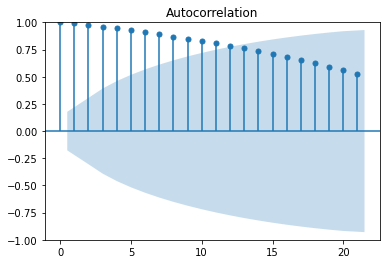

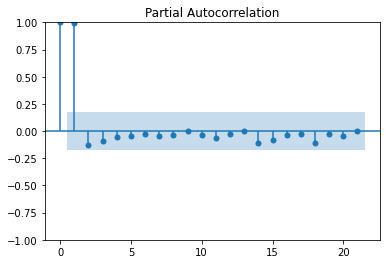

In [10]:
acf_original = plot_acf((df['co2_per_capita']))
pacf_original = plot_pacf((df['co2_per_capita']))

In [13]:
adftest = adfuller(df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020234
P-Value: 0.680511724082201
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(0,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df['co2_per_capita'], order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 0, 0, 562.4703268416655], [0, 0, 1, 412.59735871315297], [0, 0, 2, 294.8479725997667], [1, 0, 0, -3.622407458421762], [1, 0, 1, -9.310182755400902], [1, 0, 2, -9.425985832756474], [2, 0, 0, -11.327132836934553], [2, 0, 1, -15.85862972193468], [2, 0, 2, -16.685339080827525], [0, 1, 0, -11.407116814033147], [0, 1, 1, -17.01855697648329], [0, 1, 2, -17.061730740694436], [1, 1, 0, -18.949477463125753], [1, 1, 1, -20.100000294569593], [1, 1, 2, -19.08091860172863], [2, 1, 0, -18.50468642382443], [2, 1, 1, -19.160819691362562], [2, 1, 2, -17.194442177750357], [0, 2, 0, 33.98112111008051], [0, 2, 1, -16.822927379756997], [0, 2, 2, -16.587410507488983], [1, 2, 0, 10.719914313493891], [1, 2, 1, -16.729952157678145], [1, 2, 2, -14.814095610579894], [2, 2, 0, 2.8059454221799776], [2, 2, 1, -14.813692220883052], [2, 2, 2, -12.841921258529222]]


In [13]:
from pmdarima import auto_arima

In [14]:
stepwise_fit = auto_arima(df['co2_per_capita'], trace = True,
                         suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-15.347, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11.202, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17.991, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16.320, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11.407, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17.301, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18.447, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17.316, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17.241, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16.132, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20.100, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17.019, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18.949, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-19.161, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-19.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  122
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  13.050
Date:                Thu, 09 May 2024   AIC                            -20.100
Time:                        20:02:50   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.689      0.000       0.604       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.000       0.039       0.055
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                46.22
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

import statsmodels.api as sm

In [15]:
model = ARIMA(df['co2_per_capita'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Thu, 09 May 2024   AIC                            -20.100
Time:                        20:03:11   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.689      0.000       0.604       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.0

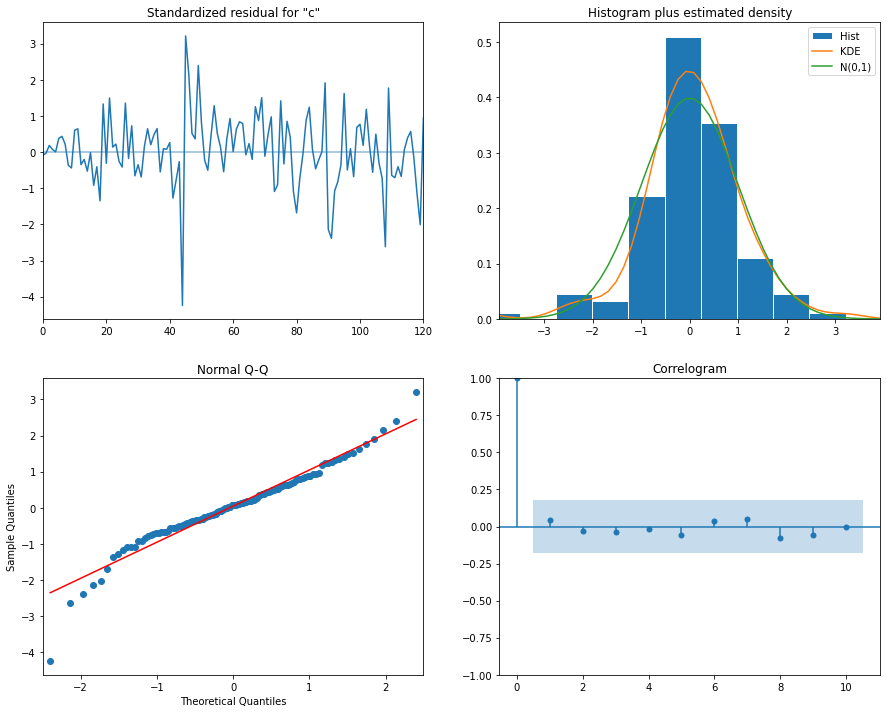

In [16]:
# Diagnosing the model residuals
model_fit.plot_diagnostics(figsize = (15, 12))
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Split the data into train and test
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

In [19]:
# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['co2_per_capita'], order=(1, 1, 1))
model_train_fit = model_train.fit()

In [20]:
# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

In [28]:
# Make Predictionson Test Set

start = len(train)
end = len(train) + len(test) -1
pred = model_fit.predict(start = start, end = end, typ = 'levels')
print(pred)

97     7.364438
98     7.193248
99     7.163120
100    6.946859
101    7.062821
102    7.229939
103    7.277192
104    7.585117
105    7.672053
106    7.572289
107    7.717080
108    7.670802
109    7.502631
110    6.827718
111    7.187625
112    7.002390
113    6.783605
114    6.625352
115    6.393264
116    6.338035
117    6.377869
118    6.484418
119    6.427799
120    6.114268
121    5.550510
Name: predicted_mean, dtype: float64


In [22]:
# Calculate the mean squared error
mse = mean_squared_error(test['co2_per_capita'], test_forecast_series)
rmse = mse**0.5

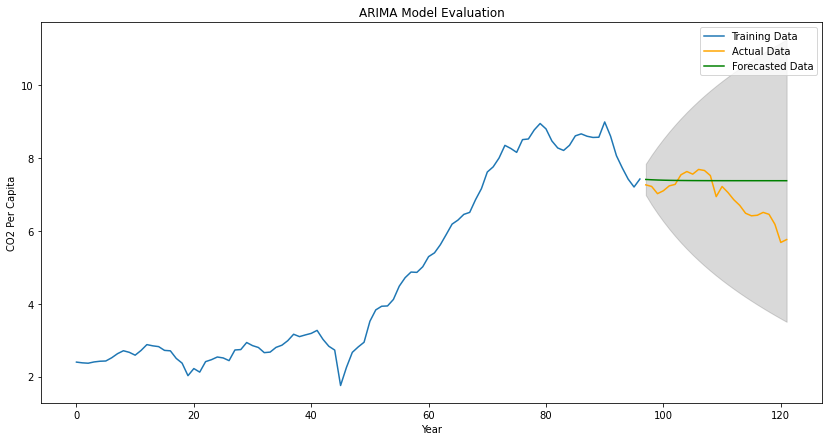

In [23]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['co2_per_capita'], label='Training Data')
plt.plot(test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.legend()
plt.show()

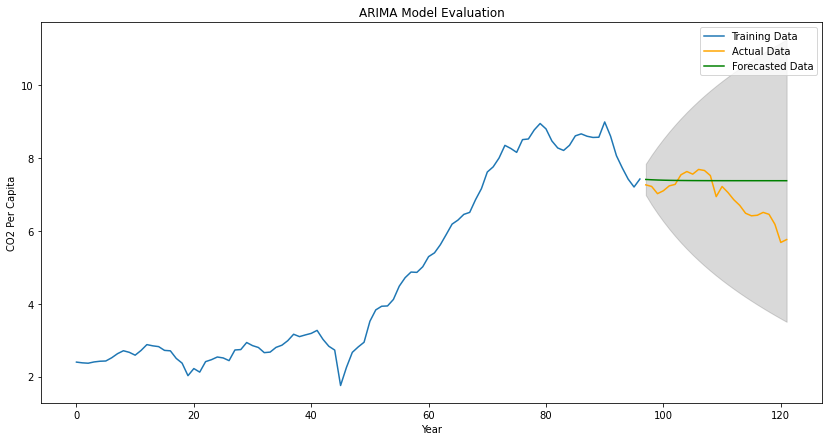

In [24]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train.index, train['co2_per_capita'], label='Training Data')
plt.plot(test.index, test['co2_per_capita'], label='Actual Data', color='orange')
plt.plot(test.index, test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.legend()
plt.show()


In [19]:
X = df.co2_per_capita.values
X = X.astype('float32')

In [20]:
size = int(len(X) * 0.50)

train = X[0:size]
test = X[size:]

history = [x for x in train]

predictions = list()

def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[1] - dataset[i - interval]
        diff.append(value)
    return diff

def inverse_difference(history, prediction, interval = 1):
    return prediction + history[-interval]

In [21]:
for t in range(len(test)):
    years = 50
    diff = difference(history, years)
    
    model = ARIMA(diff, order = (1,0,1))
    
    model_fit = model.fit()
    
    predicted_value = model_fit.forecast()[0]
    
    predicted_value = inverse_difference(history, predicted_value, years)
    
    predictions.append(predicted_value)
    
    real_value = test[t]
    
    history.append(real_value)
    print('Predicted value=%.3f, Expected value=%.3f' % (predicted_value, real_value))


Predicted value=2.522, Expected value=5.392
Predicted value=2.441, Expected value=5.615
Predicted value=2.331, Expected value=5.895
Predicted value=2.434, Expected value=6.180
Predicted value=2.255, Expected value=6.291
Predicted value=2.487, Expected value=6.447
Predicted value=2.146, Expected value=6.502
Predicted value=2.310, Expected value=6.852
Predicted value=2.017, Expected value=7.154
Predicted value=2.636, Expected value=7.609
Predicted value=2.181, Expected value=7.751
Predicted value=2.627, Expected value=7.993
Predicted value=2.401, Expected value=8.340
Predicted value=2.441, Expected value=8.256
Predicted value=2.353, Expected value=8.148
Predicted value=2.306, Expected value=8.498
Predicted value=2.660, Expected value=8.516
Predicted value=2.423, Expected value=8.764
Predicted value=2.616, Expected value=8.940
Predicted value=2.353, Expected value=8.792
Predicted value=2.382, Expected value=8.462
Predicted value=2.280, Expected value=8.269
Predicted value=2.417, Expected 

In [23]:
# Create a new column in the DataFrame to store ARIMA predictions
df['ARIMA_Predictions'] = pd.Series(predictions, index=test.index)

# Display the DataFrame with ARIMA predictions
print(df)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [22]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Compute RMSE
rmse = sqrt(mean_squared_error(df['co2_per_capita'], predictions))

# Print RMSE
print('Test RMSE: %.3f' % rmse)


ValueError: Found input variables with inconsistent numbers of samples: [122, 61]

In [36]:
# Define the start and end dates for the future predictions
start_date = '2020-01-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(years=50)

# Generate future dates
future_index = pd.date_range(start=start_date, end=end_date, freq='Y')

# Make future predictions
forecast = model_fit.forecast(steps=len(future_index))

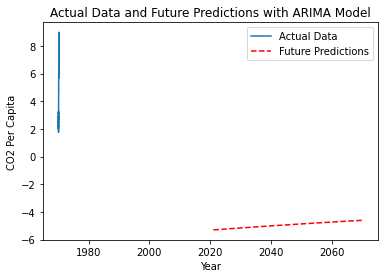

In [37]:

# Plot your existing data
plt.plot(df.index, df['co2_per_capita'], label='Actual Data')

# Plot the future predictions
plt.plot(future_index, forecast, color='r', linestyle='--', label='Future Predictions')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.title('Actual Data and Future Predictions with ARIMA Model')
plt.legend()

# Show plot
plt.show()

In [25]:

# Make future predictions
future_periods = 10  # Number of future periods to predict
forecast = model_fit.forecast(steps=future_periods)

# Print or use the forecasted values
print(forecast)

122    5.683345
123    5.620757
124    5.567326
125    5.521713
126    5.482773
127    5.449530
128    5.421151
129    5.396925
130    5.376242
131    5.358586
Name: predicted_mean, dtype: float64


In [44]:
forecast

array([-5.30614285, -5.28994272, -5.27383365, -5.25781511, -5.24188661,
       -5.22604763, -5.21029766, -5.19463622, -5.1790628 , -5.16357691,
       -5.14817805, -5.13286574, -5.11763949, -5.10249881, -5.08744324,
       -5.07247227, -5.05758545, -5.0427823 , -5.02806235, -5.01342513,
       -4.99887017, -4.98439702, -4.97000521, -4.95569428, -4.94146379,
       -4.92731328, -4.9132423 , -4.8992504 , -4.88533714, -4.87150208,
       -4.85774478, -4.8440648 , -4.8304617 , -4.81693505, -4.80348443,
       -4.79010941, -4.77680956, -4.76358446, -4.75043368, -4.73735682,
       -4.72435346, -4.71142317, -4.69856556, -4.68578022, -4.67306673,
       -4.66042469, -4.64785371, -4.63535338, -4.62292331, -4.6105631 ])

In [38]:
import plotly.graph_objects as go

# Create traces for actual data, ARIMA forecast, and future predictions
trace_actual = go.Scatter(x=df['year'], y=df['co2_per_capita'], mode='lines', name='Actual Data', line=dict(color='blue'))
trace_arima = go.Scatter(x=df['year'], y=df['Arima'], mode='lines', name='ARIMA Forecast', line=dict(color='red', dash='dash'))
trace_future = go.Scatter(x=future_index, y=forecast, mode='lines', name='Future Predictions', line=dict(color='green', dash='dash'))

# Combine traces into a data list
data = [trace_actual, trace_arima, trace_future]

# Create layout with title and axis labels
layout = go.Layout(title='CO2 Per Capita: Actual, ARIMA Forecast, and Future Predictions',
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='CO2 Per Capita'))

# Create figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Show dynamic plot
fig.show()


KeyError: 'Arima'

In [50]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Compute RMSE
rmse = sqrt(mean_squared_error(df['co2_per_capita'], predictions))

# Print RMSE
print('Test RMSE: %.3f' % rmse)


ValueError: Found input variables with inconsistent numbers of samples: [122, 37]

In [25]:
# Fit ARIMA model
model = ARIMA(df['co2_per_capita'], order=(1, 1, 1))
model_fit = model.fit()

# Generate forecasts
forecast_values = model_fit.forecast(steps=len(df))

# Add forecasts to DataFrame
df['arima_forecast'] = forecast_values

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:         co2_per_capita   No. Observations:                  122
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  13.050
Date:                Wed, 08 May 2024   AIC                            -20.100
Time:                        22:59:18   BIC                            -11.713
Sample:                             0   HQIC                           -16.694
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8537      0.128      6.689      0.000       0.604       1.104
ma.L1         -0.6816      0.149     -4.567      0.000      -0.974      -0.389
sigma2         0.0471      0.004     11.879      0.0

In [29]:
df

,year,co2_per_capita,arima_forecast
0,1900,2.395832,NaN
1,1901,2.375619,NaN
2,1902,2.365278,NaN
3,1903,2.400300,NaN
4,1904,2.419300,NaN
...,...,...,...
117,2017,6.501851,NaN
118,2018,6.448809,NaN
119,2019,6.175596,NaN
120,2020,5.677936,NaN


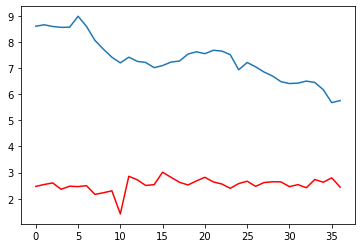

In [51]:
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()